# Halt Training at the Right Time with Early Stopping

A major challenge in training neural networks is how long to train them. Too little training will mean that the model will underfit the train and the test sets. Too much training will mean that the model will overfit the training dataset and have poor performance on the test set. A compromise is to train on the training dataset but to stop training at the point when performance on a validation dataset starts to degrade. This simple, effective, and widely used approach to training neural networks is called early stopping. In this tutorial, you will discover that stopping the training of a neural network early before it has overfitted the training dataset can reduce overfitting and improve the generalization of deep neural networks. After reading this tutorial, you will know:

* The challenge of training a neural network long enough to learn the mapping, but not so long that it overfits the training data.
* Model performance on a holdout validation dataset can be monitored during training, and training stops when generalization error starts to increase.
* The use of early stopping requires selecting a performance measure to monitor, a trigger to stop training, and a selection of the model weights to use.

## Early Stopping

In this section, discover the problem of training a model for too long and the regularizing effect that halting the training process at the right time can have, as well as tips for using early stopping in your projects.

### The Problem of Training Just Enough

Training neural networks is challenging. When training a large network, there will be a point when the model stops generalizing and starts learning the statistical noise in the training dataset. This overfitting of the training dataset will result in an increase in generalization error, making the model less useful at making predictions on new data. The challenge is to train the network long enough to learn the mapping from inputs to outputs but not training the model so long that it overfits the training data.

One approach to solving this problem is to treat the number of training epochs as a hyperparameter and train the model multiple times with different values, then select the number of epochs that result in the best performance on the train or a holdout test dataset. The downside of this approach is that it requires multiple models to be trained and discarded. This can be computationally inefficient and time-consuming, especially for large models trained on large datasets over days or weeks.

### Stop Training When Generalization Error Increases

An alternative approach is to train the model once for a large number of training epochs. During training, the model is evaluated on a holdout validation dataset after each epoch. If the model's performance on the validation dataset starts to degrade (e.g., loss begins to increase or accuracy begins to decrease), then the training process is stopped.

The model when training is stopped is then used and is known to have good generalization performance. This procedure is called early stopping and is perhaps one of the oldest and most widely used forms of neural network regularization.

If regularization methods like weight decay that update the loss function to encourage less complex models are considered explicit regularization, then early stopping may be thought of as a type of implicit regularization, much like using a smaller network with less capacity. 

### How to Stop Training Early

Early stopping requires that you configure your network to be under constrained, meaning that it has more capacity than is required for the problem. When training the network, a larger number of training epochs is used than may normally be required to give the network plenty of opportunity to fit, then begin to overfit the training dataset. There are three elements to using early stopping; they are:

* Monitoring model performance.
* Trigger to stop training.
* The choice of model to use.

**Monitoring Performance**

The performance of the model must be monitored during training. This requires choosing a dataset used to evaluate the model and a metric used to evaluate the model. It is common to split the training dataset and use a subset, such as 30%, as a validation dataset used to monitor the model's performance during training. This validation set is not used to train the model. It is also common to use the loss on a validation dataset as the metric to monitor, although you may also use prediction error in the case of regression or accuracy in the case of classification.

The model's performance is evaluated on the validation set at the end of each epoch, which adds an additional computational cost during training. This can be reduced by evaluating the model less frequently, such as every 2, 5, or 10 training epochs. The loss of the model on the training dataset will also be available as part of the training procedure, and additional metrics may also be calculated and monitored on the training dataset.

**Early Stopping Trigger**

Once a scheme for evaluating the model is selected, a trigger for stopping the training process must be chosen. The trigger will use a monitored performance metric to decide when to stop training. This is often the performance of the model on the holdout dataset, such as the loss. In the simplest case, training is stopped as soon as the performance on the validation dataset decreases as compared to the performance on the validation dataset at the prior training epoch (e.g., an increase in loss). More elaborate triggers may be required in practice. This is because the training of a neural network is stochastic and can be noisy. Plotted on a graph, the performance of a model on a validation dataset may go up and down many times. This means that the first sign of overfitting may not be a good place to stop training.

Some more elaborate triggers may include:
* No change in metric over a given number of epochs.
* An absolute change in a metric.
* A decrease in performance was observed over a given number of epochs.
* The average change in metric over a given number of epochs.

Some delay or patience in stopping is almost always a good idea.

**Model Choice**

When training is halted, the model is known to have a slightly worse generalization error than a model at a prior epoch. As such, some consideration may need to be given as to exactly which model is saved. Specifically, the training epoch from which weights in the model are saved to file. This will depend on the trigger chosen to stop the training process. For example, if the trigger is a simple decrease in performance from one epoch to the next, then the weights for the model at the prior epoch will be preferred. If the trigger is required to observe a decrease in performance over a fixed number of epochs, the model will be preferred at the beginning of the trigger period. Perhaps a simple approach is always to save the model weights if the model's performance on a holdout dataset is better than at the previous epoch. That way, you will always have the model with the best performance on the holdout set.

### Tips for Early Stopping

This section provides some tips for using early stopping regularization with your neural network.

**When to Use Early Stopping**

Early stopping is so easy to use, e.g., with the simplest trigger, that there is little reason not to use it when training neural networks. The use of early stopping may be a staple of the modern training of deep neural networks.

**Plot Learning Curves to Select a Trigger**

Before using early stopping, it may be interesting to fit an under-constrained model and monitor its performance on a train and validation dataset. Plotting the model's performance in real-time or at the end of a long run will show how noisy the training process is with your specific model and dataset. This may help in the choice of a trigger for early stopping.

**Monitor an Important Metric**

Loss is an easy metric to monitor during training and to trigger early stopping. The problem is that loss does not always capture the most important model to you and your project.

It may be better to choose a performance metric to monitor that best defines the model's performance in terms of how you intend to use it. This may be the metric that you intend to use to report the performance of the model.

**Suggested Training Epochs**

A problem with early stopping is that the model does not make use of all available training data. It may be desirable to avoid overfitting and train on all possible data, especially on problems where training data is very limited. A recommended approach would be to treat the number of training epochs as a hyperparameter and to grid search a range of different values, perhaps using k-fold cross-validation. This will allow you to fix the number of training epochs and fit a final model on all available data.

Early stopping could be used instead. The early stopping procedure could be repeated a number of times. The epoch number at which training was stopped could be recorded. Then, the average of the epoch number across all repeats of early stopping could be used when fitting a final model on all available training data. This process could be performed using a different training split into train and validation steps each time early stopping runs. An alternative might be to use early stopping with a validation dataset, then update the final model with further training on the held-out validation set.

**Early Stopping With Cross-Validation**

Early stopping could be used with k-fold cross-validation, although it is not recommended. The k-fold cross-validation procedure is designed to estimate the generalization error by repeatedly refitting and evaluating it on different subsets of a dataset. Early stopping is designed to monitor the generalization error of one model and stop training when generalization error begins to degrade. They are at odds because cross-validation assumes you do not know the generalization error, and early stopping is trying to give you the best model based on knowledge of generalization error.

One possible point of confusion is that early stopping is sometimes referred to as cross-validated training. It may be desirable to use cross-validation to estimate the performance of models with different hyperparameter values, such as learning rate or network structure, while also using early stopping. In this case, if you have the resources to evaluate the model's performance repeatedly, then perhaps the number of training epochs may also be treated as a hyperparameter to be optimized instead of using early stopping. Instead of using cross-validation with early stopping, early stopping may be used directly without repeated evaluation when evaluating different hyperparameter values for the model (e.g., different learning rates). Further, research into early stopping that compares triggers may use cross-validation to compare the impact of different triggers.

**Overfit Validation**

Repeating the early stopping procedure many times may result in the model overfitting the validation dataset. This can happen just as easily as overfitting the training dataset. One approach is only to use early stopping once all other hyperparameters of the model have been chosen. Another strategy may be to use a different split of the training dataset into train and validation sets each time early stopping is used.

## Early Stopping Case Study

In this section, we will demonstrate how to use early stopping to reduce the overfitting of an MLP on a simple binary classification problem. This example provides a template for applying early stopping to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two semi-circles of observations: one semi-circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the `moons` dataset because of the shape of the observations in each class when plotted. We can use the `make_moons()` function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
```

We can plot the dataset where the two variables are taken as `x` and `y` coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

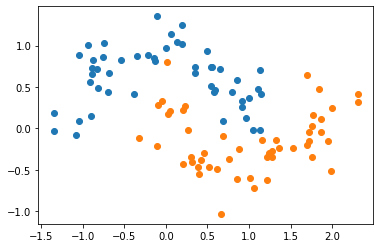

In [1]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot showing the semi-circle or moon shape of the observations in each class. We can see the noise in the dispersal of the points, making the moons less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address. We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have a higher error on the test dataset: a good case for using regularization. Further, the samples have noise, allowing the model to learn aspects of the samples that do not generalize.

### Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits. Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model's performance.

In [2]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model. The model uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer to predict class values of 0 or 1. The model is optimized using the binary cross-entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [3]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32. We will use the test set as the validation dataset to get an idea of the model performance on a holdout dataset during training.

In [4]:
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)

Epoch 1/4000
1/1 [==============================] - 1s 850ms/step - loss: 0.6704 - accuracy: 0.8667 - val_loss: 0.6633 - val_accuracy: 0.7286
Epoch 2/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.6543 - accuracy: 0.9000 - val_loss: 0.6530 - val_accuracy: 0.7286
Epoch 3/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.6386 - accuracy: 0.9000 - val_loss: 0.6431 - val_accuracy: 0.7286
Epoch 4/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.6234 - accuracy: 0.8667 - val_loss: 0.6335 - val_accuracy: 0.7286
Epoch 5/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6085 - accuracy: 0.9000 - val_loss: 0.6242 - val_accuracy: 0.7286
Epoch 6/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.5940 - accuracy: 0.9000 - val_loss: 0.6152 - val_accuracy: 0.7286
Epoch 7/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.5800 - accuracy: 0.9000 - val_loss: 0.6066 - val_accuracy: 0.7286
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2304 - accuracy: 0.8667 - val_loss: 0.4427 - val_accuracy: 0.7429
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2283 - accuracy: 0.8667 - val_loss: 0.4423 - val_accuracy: 0.7429
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2264 - accuracy: 0.8667 - val_loss: 0.4419 - val_accuracy: 0.7429
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2245 - accuracy: 0.8667 - val_loss: 0.4415 - val_accuracy: 0.7429
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2227 - accuracy: 0.8667 - val_loss: 0.4411 - val_accuracy: 0.7429
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2209 - accuracy: 0.8667 - val_loss: 0.4407 - val_accuracy: 0.7429
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2193 - accuracy: 0.8667 - val_loss: 0.4403 - val_accuracy: 0.7429
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.1739 - accuracy: 0.9333 - val_loss: 0.4072 - val_accuracy: 0.8143
Epoch 117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1734 - accuracy: 0.9333 - val_loss: 0.4065 - val_accuracy: 0.8143
Epoch 118/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1728 - accuracy: 0.9333 - val_loss: 0.4057 - val_accuracy: 0.8143
Epoch 119/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1723 - accuracy: 0.9333 - val_loss: 0.4049 - val_accuracy: 0.8143
Epoch 120/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1718 - accuracy: 0.9333 - val_loss: 0.4042 - val_accuracy: 0.8143
Epoch 121/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1713 - accuracy: 0.9333 - val_loss: 0.4034 - val_accuracy: 0.8143
Epoch 122/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1707 - accuracy: 0.9333 - val_loss: 0.4027 - val_accuracy: 0.8286
Epoch 123/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1509 - accuracy: 0.9667 - val_loss: 0.3743 - val_accuracy: 0.8286
Epoch 174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1506 - accuracy: 0.9667 - val_loss: 0.3740 - val_accuracy: 0.8286
Epoch 175/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1503 - accuracy: 0.9667 - val_loss: 0.3737 - val_accuracy: 0.8286
Epoch 176/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1501 - accuracy: 0.9667 - val_loss: 0.3734 - val_accuracy: 0.8286
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1498 - accuracy: 0.9667 - val_loss: 0.3731 - val_accuracy: 0.8286
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1495 - accuracy: 0.9667 - val_loss: 0.3728 - val_accuracy: 0.8286
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1493 - accuracy: 0.9667 - val_loss: 0.3726 - val_accuracy: 0.8286
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1406 - accuracy: 0.9667 - val_loss: 0.3697 - val_accuracy: 0.8143
Epoch 231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1405 - accuracy: 0.9667 - val_loss: 0.3697 - val_accuracy: 0.8143
Epoch 232/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1403 - accuracy: 0.9667 - val_loss: 0.3698 - val_accuracy: 0.8143
Epoch 233/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1402 - accuracy: 0.9667 - val_loss: 0.3698 - val_accuracy: 0.8143
Epoch 234/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1401 - accuracy: 0.9667 - val_loss: 0.3698 - val_accuracy: 0.8143
Epoch 235/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1400 - accuracy: 0.9667 - val_loss: 0.3699 - val_accuracy: 0.8143
Epoch 236/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1399 - accuracy: 0.9667 - val_loss: 0.3700 - val_accuracy: 0.8143
Epoch 237/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1355 - accuracy: 0.9667 - val_loss: 0.3721 - val_accuracy: 0.8429
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1354 - accuracy: 0.9667 - val_loss: 0.3721 - val_accuracy: 0.8429
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1353 - accuracy: 0.9667 - val_loss: 0.3721 - val_accuracy: 0.8429
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1352 - accuracy: 0.9667 - val_loss: 0.3721 - val_accuracy: 0.8429
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1352 - accuracy: 0.9667 - val_loss: 0.3721 - val_accuracy: 0.8429
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1351 - accuracy: 0.9667 - val_loss: 0.3721 - val_accuracy: 0.8429
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1350 - accuracy: 0.9667 - val_loss: 0.3722 - val_accuracy: 0.8429
Epoch 294/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1309 - accuracy: 0.9667 - val_loss: 0.3716 - val_accuracy: 0.8429
Epoch 345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1308 - accuracy: 0.9667 - val_loss: 0.3715 - val_accuracy: 0.8429
Epoch 346/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1307 - accuracy: 0.9667 - val_loss: 0.3715 - val_accuracy: 0.8429
Epoch 347/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1306 - accuracy: 0.9667 - val_loss: 0.3715 - val_accuracy: 0.8429
Epoch 348/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1305 - accuracy: 0.9667 - val_loss: 0.3714 - val_accuracy: 0.8429
Epoch 349/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1304 - accuracy: 0.9667 - val_loss: 0.3713 - val_accuracy: 0.8429
Epoch 350/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1303 - accuracy: 0.9667 - val_loss: 0.3712 - val_accuracy: 0.8429
Epoch 351/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1246 - accuracy: 0.9667 - val_loss: 0.3636 - val_accuracy: 0.8429
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1245 - accuracy: 0.9667 - val_loss: 0.3634 - val_accuracy: 0.8429
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1243 - accuracy: 0.9667 - val_loss: 0.3631 - val_accuracy: 0.8429
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1242 - accuracy: 0.9667 - val_loss: 0.3628 - val_accuracy: 0.8429
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1240 - accuracy: 0.9667 - val_loss: 0.3625 - val_accuracy: 0.8429
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1239 - accuracy: 0.9667 - val_loss: 0.3622 - val_accuracy: 0.8429
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1237 - accuracy: 0.9667 - val_loss: 0.3619 - val_accuracy: 0.8429
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1145 - accuracy: 0.9667 - val_loss: 0.3474 - val_accuracy: 0.8429
Epoch 459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1143 - accuracy: 0.9667 - val_loss: 0.3471 - val_accuracy: 0.8429
Epoch 460/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1141 - accuracy: 0.9667 - val_loss: 0.3468 - val_accuracy: 0.8429
Epoch 461/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1139 - accuracy: 0.9667 - val_loss: 0.3464 - val_accuracy: 0.8429
Epoch 462/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1137 - accuracy: 0.9667 - val_loss: 0.3460 - val_accuracy: 0.8429
Epoch 463/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1135 - accuracy: 0.9667 - val_loss: 0.3456 - val_accuracy: 0.8429
Epoch 464/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1132 - accuracy: 0.9667 - val_loss: 0.3452 - val_accuracy: 0.8429
Epoch 465/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1009 - accuracy: 0.9667 - val_loss: 0.3201 - val_accuracy: 0.8429
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1006 - accuracy: 0.9667 - val_loss: 0.3196 - val_accuracy: 0.8429
Epoch 517/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1004 - accuracy: 0.9667 - val_loss: 0.3190 - val_accuracy: 0.8429
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1001 - accuracy: 0.9667 - val_loss: 0.3185 - val_accuracy: 0.8429
Epoch 519/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0998 - accuracy: 0.9667 - val_loss: 0.3180 - val_accuracy: 0.8429
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0995 - accuracy: 0.9667 - val_loss: 0.3176 - val_accuracy: 0.8429
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0993 - accuracy: 0.9667 - val_loss: 0.3170 - val_accuracy: 0.8429
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0848 - accuracy: 0.9667 - val_loss: 0.2933 - val_accuracy: 0.8857
Epoch 573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0846 - accuracy: 0.9667 - val_loss: 0.2928 - val_accuracy: 0.8857
Epoch 574/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0843 - accuracy: 0.9667 - val_loss: 0.2922 - val_accuracy: 0.8857
Epoch 575/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0840 - accuracy: 0.9667 - val_loss: 0.2917 - val_accuracy: 0.8857
Epoch 576/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0837 - accuracy: 0.9667 - val_loss: 0.2911 - val_accuracy: 0.8857
Epoch 577/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0834 - accuracy: 0.9667 - val_loss: 0.2906 - val_accuracy: 0.8857
Epoch 578/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0832 - accuracy: 0.9667 - val_loss: 0.2900 - val_accuracy: 0.8857
Epoch 579/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0687 - accuracy: 0.9667 - val_loss: 0.2657 - val_accuracy: 0.9000
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0684 - accuracy: 0.9667 - val_loss: 0.2653 - val_accuracy: 0.9000
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0681 - accuracy: 0.9667 - val_loss: 0.2649 - val_accuracy: 0.9000
Epoch 632/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0679 - accuracy: 0.9667 - val_loss: 0.2645 - val_accuracy: 0.9000
Epoch 633/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0676 - accuracy: 0.9667 - val_loss: 0.2640 - val_accuracy: 0.9000
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0673 - accuracy: 0.9667 - val_loss: 0.2636 - val_accuracy: 0.9000
Epoch 635/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0671 - accuracy: 0.9667 - val_loss: 0.2633 - val_accuracy: 0.9000
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0537 - accuracy: 0.9667 - val_loss: 0.2486 - val_accuracy: 0.9286
Epoch 687/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0535 - accuracy: 0.9667 - val_loss: 0.2483 - val_accuracy: 0.9286
Epoch 688/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0532 - accuracy: 0.9667 - val_loss: 0.2481 - val_accuracy: 0.9286
Epoch 689/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0530 - accuracy: 0.9667 - val_loss: 0.2478 - val_accuracy: 0.9286
Epoch 690/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0527 - accuracy: 0.9667 - val_loss: 0.2475 - val_accuracy: 0.9286
Epoch 691/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0525 - accuracy: 0.9667 - val_loss: 0.2472 - val_accuracy: 0.9286
Epoch 692/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0523 - accuracy: 0.9667 - val_loss: 0.2469 - val_accuracy: 0.9286
Epoch 693/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 0.2370 - val_accuracy: 0.9286
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.2369 - val_accuracy: 0.9286
Epoch 745/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.2368 - val_accuracy: 0.9286
Epoch 746/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 0.2366 - val_accuracy: 0.9286
Epoch 747/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 0.2365 - val_accuracy: 0.9286
Epoch 748/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 0.2364 - val_accuracy: 0.9286
Epoch 749/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.2362 - val_accuracy: 0.9286
Epoch 750/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9286
Epoch 801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.2320 - val_accuracy: 0.9286
Epoch 802/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.2320 - val_accuracy: 0.9286
Epoch 803/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0318 - accuracy: 1.0000 - val_loss: 0.2320 - val_accuracy: 0.9286
Epoch 804/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0317 - accuracy: 1.0000 - val_loss: 0.2319 - val_accuracy: 0.9286
Epoch 805/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.2319 - val_accuracy: 0.9286
Epoch 806/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.2319 - val_accuracy: 0.9286
Epoch 807/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.2342 - val_accuracy: 0.9429
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.2343 - val_accuracy: 0.9429
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.2343 - val_accuracy: 0.9429
Epoch 860/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.2344 - val_accuracy: 0.9429
Epoch 861/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.2345 - val_accuracy: 0.9429
Epoch 862/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.2346 - val_accuracy: 0.9429
Epoch 863/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.2347 - val_accuracy: 0.9429
Epoch 864/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.2400 - val_accuracy: 0.9429
Epoch 915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.2401 - val_accuracy: 0.9429
Epoch 916/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.2402 - val_accuracy: 0.9429
Epoch 917/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.2403 - val_accuracy: 0.9429
Epoch 918/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.2404 - val_accuracy: 0.9429
Epoch 919/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.2406 - val_accuracy: 0.9429
Epoch 920/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.2407 - val_accuracy: 0.9429
Epoch 921/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.2482 - val_accuracy: 0.9429
Epoch 972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.2483 - val_accuracy: 0.9429
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.2485 - val_accuracy: 0.9429
Epoch 974/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.2487 - val_accuracy: 0.9429
Epoch 975/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.2488 - val_accuracy: 0.9429
Epoch 976/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.2489 - val_accuracy: 0.9429
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.2491 - val_accuracy: 0.9429
Epoch 978/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.2575 - val_accuracy: 0.9429
Epoch 1029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.2577 - val_accuracy: 0.9429
Epoch 1030/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2579 - val_accuracy: 0.9429
Epoch 1031/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2581 - val_accuracy: 0.9429
Epoch 1032/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2583 - val_accuracy: 0.9429
Epoch 1033/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2584 - val_accuracy: 0.9429
Epoch 1034/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2586 - val_accuracy: 0.9429
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.2679 - val_accuracy: 0.9429
Epoch 1086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.2681 - val_accuracy: 0.9429
Epoch 1087/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.2683 - val_accuracy: 0.9429
Epoch 1088/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.2684 - val_accuracy: 0.9429
Epoch 1089/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.2686 - val_accuracy: 0.9429
Epoch 1090/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.2688 - val_accuracy: 0.9429
Epoch 1091/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.2690 - val_accuracy: 0.9429
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2774 - val_accuracy: 0.9429
Epoch 1143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2776 - val_accuracy: 0.9429
Epoch 1144/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2777 - val_accuracy: 0.9429
Epoch 1145/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2779 - val_accuracy: 0.9429
Epoch 1146/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.2781 - val_accuracy: 0.9429
Epoch 1147/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.2782 - val_accuracy: 0.9429
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.2784 - val_accuracy: 0.9429
Epoch 11

1/1 [==============================] - 0s 22ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2870 - val_accuracy: 0.9429
Epoch 1200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.2872 - val_accuracy: 0.9429
Epoch 1201/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.2874 - val_accuracy: 0.9429
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.2875 - val_accuracy: 0.9429
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.2877 - val_accuracy: 0.9429
Epoch 1204/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.2879 - val_accuracy: 0.9429
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.2880 - val_accuracy: 0.9429
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2958 - val_accuracy: 0.9429
Epoch 1257/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2959 - val_accuracy: 0.9429
Epoch 1258/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2961 - val_accuracy: 0.9429
Epoch 1259/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.2962 - val_accuracy: 0.9429
Epoch 1260/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.2963 - val_accuracy: 0.9429
Epoch 1261/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.9429
Epoch 1262/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.2966 - val_accuracy: 0.9429
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3038 - val_accuracy: 0.9429
Epoch 1314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.9429
Epoch 1315/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3041 - val_accuracy: 0.9429
Epoch 1316/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3043 - val_accuracy: 0.9429
Epoch 1317/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3044 - val_accuracy: 0.9429
Epoch 1318/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3045 - val_accuracy: 0.9429
Epoch 1319/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3046 - val_accuracy: 0.9429
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3117 - val_accuracy: 0.9429
Epoch 1371/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3118 - val_accuracy: 0.9429
Epoch 1372/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3120 - val_accuracy: 0.9429
Epoch 1373/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3121 - val_accuracy: 0.9429
Epoch 1374/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3122 - val_accuracy: 0.9429
Epoch 1375/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3123 - val_accuracy: 0.9429
Epoch 1376/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3125 - val_accuracy: 0.9429
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3191 - val_accuracy: 0.9429
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3192 - val_accuracy: 0.9429
Epoch 1429/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3194 - val_accuracy: 0.9429
Epoch 1430/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3195 - val_accuracy: 0.9429
Epoch 1431/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3196 - val_accuracy: 0.9429
Epoch 1432/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3198 - val_accuracy: 0.9429
Epoch 1433/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3199 - val_accuracy: 0.9429
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.9286
Epoch 1485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3264 - val_accuracy: 0.9286
Epoch 1486/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3265 - val_accuracy: 0.9286
Epoch 1487/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3266 - val_accuracy: 0.9286
Epoch 1488/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3267 - val_accuracy: 0.9286
Epoch 1489/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3268 - val_accuracy: 0.9286
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3270 - val_accuracy: 0.9286
Epoch 14

1/1 [==============================] - 0s 23ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3330 - val_accuracy: 0.9286
Epoch 1542/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3331 - val_accuracy: 0.9286
Epoch 1543/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3332 - val_accuracy: 0.9286
Epoch 1544/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3333 - val_accuracy: 0.9286
Epoch 1545/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3335 - val_accuracy: 0.9286
Epoch 1546/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3336 - val_accuracy: 0.9286
Epoch 1547/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3337 - val_accuracy: 0.9286
Epoch 15

1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3393 - val_accuracy: 0.9286
Epoch 1599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3395 - val_accuracy: 0.9286
Epoch 1600/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3396 - val_accuracy: 0.9286
Epoch 1601/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3397 - val_accuracy: 0.9286
Epoch 1602/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3398 - val_accuracy: 0.9286
Epoch 1603/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3399 - val_accuracy: 0.9286
Epoch 1604/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3400 - val_accuracy: 0.9286
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3455 - val_accuracy: 0.9286
Epoch 1656/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3456 - val_accuracy: 0.9286
Epoch 1657/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3457 - val_accuracy: 0.9286
Epoch 1658/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3458 - val_accuracy: 0.9286
Epoch 1659/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3459 - val_accuracy: 0.9286
Epoch 1660/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3460 - val_accuracy: 0.9286
Epoch 1661/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3461 - val_accuracy: 0.9286
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3514 - val_accuracy: 0.9286
Epoch 1713/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3515 - val_accuracy: 0.9286
Epoch 1714/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3516 - val_accuracy: 0.9286
Epoch 1715/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3517 - val_accuracy: 0.9286
Epoch 1716/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3519 - val_accuracy: 0.9286
Epoch 1717/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3520 - val_accuracy: 0.9286
Epoch 1718/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3521 - val_accuracy: 0.9286
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3572 - val_accuracy: 0.9286
Epoch 1770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3573 - val_accuracy: 0.9286
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3574 - val_accuracy: 0.9286
Epoch 1772/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3575 - val_accuracy: 0.9286
Epoch 1773/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3576 - val_accuracy: 0.9286
Epoch 1774/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3577 - val_accuracy: 0.9286
Epoch 1775/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3578 - val_accuracy: 0.9286
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3627 - val_accuracy: 0.9286
Epoch 1827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3628 - val_accuracy: 0.9286
Epoch 1828/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3629 - val_accuracy: 0.9286
Epoch 1829/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3630 - val_accuracy: 0.9286
Epoch 1830/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3631 - val_accuracy: 0.9286
Epoch 1831/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3632 - val_accuracy: 0.9286
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.9286
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3681 - val_accuracy: 0.9286
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3682 - val_accuracy: 0.9286
Epoch 1885/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3683 - val_accuracy: 0.9286
Epoch 1886/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3684 - val_accuracy: 0.9286
Epoch 1887/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3685 - val_accuracy: 0.9286
Epoch 1888/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3686 - val_accuracy: 0.9286
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3687 - val_accuracy: 0.9286
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3734 - val_accuracy: 0.9286
Epoch 1941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3734 - val_accuracy: 0.9286
Epoch 1942/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3735 - val_accuracy: 0.9286
Epoch 1943/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3736 - val_accuracy: 0.9286
Epoch 1944/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3737 - val_accuracy: 0.9286
Epoch 1945/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3738 - val_accuracy: 0.9286
Epoch 1946/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3739 - val_accuracy: 0.9286
Epoch 19

1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3784 - val_accuracy: 0.9286
Epoch 1998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3784 - val_accuracy: 0.9286
Epoch 1999/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3785 - val_accuracy: 0.9286
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3786 - val_accuracy: 0.9286
Epoch 2001/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3787 - val_accuracy: 0.9286
Epoch 2002/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3788 - val_accuracy: 0.9286
Epoch 2003/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3789 - val_accuracy: 0.9286
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3832 - val_accuracy: 0.9286
Epoch 2055/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3833 - val_accuracy: 0.9286
Epoch 2056/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3834 - val_accuracy: 0.9286
Epoch 2057/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3835 - val_accuracy: 0.9286
Epoch 2058/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3836 - val_accuracy: 0.9286
Epoch 2059/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3836 - val_accuracy: 0.9286
Epoch 2060/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3837 - val_accuracy: 0.9286
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3879 - val_accuracy: 0.9286
Epoch 2112/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3879 - val_accuracy: 0.9286
Epoch 2113/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3880 - val_accuracy: 0.9286
Epoch 2114/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3881 - val_accuracy: 0.9286
Epoch 2115/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3882 - val_accuracy: 0.9286
Epoch 2116/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3883 - val_accuracy: 0.9286
Epoch 2117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3883 - val_accuracy: 0.9286
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3924 - val_accuracy: 0.9286
Epoch 2169/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3925 - val_accuracy: 0.9286
Epoch 2170/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3926 - val_accuracy: 0.9286
Epoch 2171/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3927 - val_accuracy: 0.9286
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3927 - val_accuracy: 0.9286
Epoch 2173/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3928 - val_accuracy: 0.9286
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3929 - val_accuracy: 0.9286
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3969 - val_accuracy: 0.9286
Epoch 2226/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3970 - val_accuracy: 0.9286
Epoch 2227/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3971 - val_accuracy: 0.9286
Epoch 2228/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3972 - val_accuracy: 0.9286
Epoch 2229/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3972 - val_accuracy: 0.9286
Epoch 2230/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3973 - val_accuracy: 0.9286
Epoch 2231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3974 - val_accuracy: 0.9286
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 9.6000e-04 - accuracy: 1.0000 - val_loss: 0.4013 - val_accuracy: 0.9286
Epoch 2282/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.5881e-04 - accuracy: 1.0000 - val_loss: 0.4014 - val_accuracy: 0.9286
Epoch 2283/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.5752e-04 - accuracy: 1.0000 - val_loss: 0.4014 - val_accuracy: 0.9286
Epoch 2284/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.5629e-04 - accuracy: 1.0000 - val_loss: 0.4015 - val_accuracy: 0.9286
Epoch 2285/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.5509e-04 - accuracy: 1.0000 - val_loss: 0.4016 - val_accuracy: 0.9286
Epoch 2286/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.5390e-04 - accuracy: 1.0000 - val_loss: 0.4017 - val_accuracy: 0.9286
Epoch 2287/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.5269e-04 - accuracy: 1.0000 - val_loss: 0.4017 - v

1/1 [==============================] - 0s 22ms/step - loss: 8.9587e-04 - accuracy: 1.0000 - val_loss: 0.4054 - val_accuracy: 0.9286
Epoch 2337/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.9471e-04 - accuracy: 1.0000 - val_loss: 0.4055 - val_accuracy: 0.9286
Epoch 2338/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.9358e-04 - accuracy: 1.0000 - val_loss: 0.4056 - val_accuracy: 0.9286
Epoch 2339/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.9253e-04 - accuracy: 1.0000 - val_loss: 0.4057 - val_accuracy: 0.9286
Epoch 2340/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.9145e-04 - accuracy: 1.0000 - val_loss: 0.4057 - val_accuracy: 0.9286
Epoch 2341/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.9031e-04 - accuracy: 1.0000 - val_loss: 0.4058 - val_accuracy: 0.9286
Epoch 2342/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.8919e-04 - accuracy: 1.0000 - val_loss: 0.4059 - v

1/1 [==============================] - 0s 22ms/step - loss: 8.3734e-04 - accuracy: 1.0000 - val_loss: 0.4095 - val_accuracy: 0.9286
Epoch 2392/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.3633e-04 - accuracy: 1.0000 - val_loss: 0.4096 - val_accuracy: 0.9286
Epoch 2393/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.3537e-04 - accuracy: 1.0000 - val_loss: 0.4096 - val_accuracy: 0.9286
Epoch 2394/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.3438e-04 - accuracy: 1.0000 - val_loss: 0.4097 - val_accuracy: 0.9286
Epoch 2395/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.3338e-04 - accuracy: 1.0000 - val_loss: 0.4098 - val_accuracy: 0.9286
Epoch 2396/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.3232e-04 - accuracy: 1.0000 - val_loss: 0.4099 - val_accuracy: 0.9286
Epoch 2397/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.3131e-04 - accuracy: 1.0000 - val_loss: 0.4099 - v

1/1 [==============================] - 0s 22ms/step - loss: 7.8387e-04 - accuracy: 1.0000 - val_loss: 0.4135 - val_accuracy: 0.9143
Epoch 2447/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.8299e-04 - accuracy: 1.0000 - val_loss: 0.4136 - val_accuracy: 0.9143
Epoch 2448/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.8210e-04 - accuracy: 1.0000 - val_loss: 0.4137 - val_accuracy: 0.9143
Epoch 2449/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.8117e-04 - accuracy: 1.0000 - val_loss: 0.4137 - val_accuracy: 0.9143
Epoch 2450/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.8021e-04 - accuracy: 1.0000 - val_loss: 0.4138 - val_accuracy: 0.9143
Epoch 2451/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.7929e-04 - accuracy: 1.0000 - val_loss: 0.4139 - val_accuracy: 0.9143
Epoch 2452/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.7836e-04 - accuracy: 1.0000 - val_loss: 0.4139 - v

1/1 [==============================] - 0s 23ms/step - loss: 7.3494e-04 - accuracy: 1.0000 - val_loss: 0.4174 - val_accuracy: 0.9143
Epoch 2502/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.3404e-04 - accuracy: 1.0000 - val_loss: 0.4175 - val_accuracy: 0.9143
Epoch 2503/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.3324e-04 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.9143
Epoch 2504/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.3239e-04 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.9143
Epoch 2505/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.3150e-04 - accuracy: 1.0000 - val_loss: 0.4177 - val_accuracy: 0.9143
Epoch 2506/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.3061e-04 - accuracy: 1.0000 - val_loss: 0.4178 - val_accuracy: 0.9143
Epoch 2507/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.2981e-04 - accuracy: 1.0000 - val_loss: 0.4178 - v

1/1 [==============================] - 0s 23ms/step - loss: 6.9006e-04 - accuracy: 1.0000 - val_loss: 0.4213 - val_accuracy: 0.9143
Epoch 2557/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.8926e-04 - accuracy: 1.0000 - val_loss: 0.4213 - val_accuracy: 0.9143
Epoch 2558/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.8844e-04 - accuracy: 1.0000 - val_loss: 0.4214 - val_accuracy: 0.9143
Epoch 2559/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.8767e-04 - accuracy: 1.0000 - val_loss: 0.4215 - val_accuracy: 0.9143
Epoch 2560/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.8689e-04 - accuracy: 1.0000 - val_loss: 0.4216 - val_accuracy: 0.9143
Epoch 2561/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.8611e-04 - accuracy: 1.0000 - val_loss: 0.4216 - val_accuracy: 0.9143
Epoch 2562/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.8537e-04 - accuracy: 1.0000 - val_loss: 0.4217 - v

1/1 [==============================] - 0s 23ms/step - loss: 6.4859e-04 - accuracy: 1.0000 - val_loss: 0.4251 - val_accuracy: 0.9143
Epoch 2612/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.4788e-04 - accuracy: 1.0000 - val_loss: 0.4251 - val_accuracy: 0.9143
Epoch 2613/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.4715e-04 - accuracy: 1.0000 - val_loss: 0.4252 - val_accuracy: 0.9143
Epoch 2614/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.4640e-04 - accuracy: 1.0000 - val_loss: 0.4253 - val_accuracy: 0.9143
Epoch 2615/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.4573e-04 - accuracy: 1.0000 - val_loss: 0.4254 - val_accuracy: 0.9143
Epoch 2616/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.4502e-04 - accuracy: 1.0000 - val_loss: 0.4254 - val_accuracy: 0.9143
Epoch 2617/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.4428e-04 - accuracy: 1.0000 - val_loss: 0.4255 - v

1/1 [==============================] - 0s 22ms/step - loss: 6.1046e-04 - accuracy: 1.0000 - val_loss: 0.4288 - val_accuracy: 0.9143
Epoch 2667/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.0979e-04 - accuracy: 1.0000 - val_loss: 0.4289 - val_accuracy: 0.9143
Epoch 2668/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.0910e-04 - accuracy: 1.0000 - val_loss: 0.4289 - val_accuracy: 0.9143
Epoch 2669/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.0844e-04 - accuracy: 1.0000 - val_loss: 0.4290 - val_accuracy: 0.9143
Epoch 2670/4000
1/1 [==============================] - 0s 25ms/step - loss: 6.0781e-04 - accuracy: 1.0000 - val_loss: 0.4291 - val_accuracy: 0.9143
Epoch 2671/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.0714e-04 - accuracy: 1.0000 - val_loss: 0.4291 - val_accuracy: 0.9143
Epoch 2672/4000
1/1 [==============================] - 0s 86ms/step - loss: 6.0647e-04 - accuracy: 1.0000 - val_loss: 0.4292 - v

1/1 [==============================] - 0s 22ms/step - loss: 5.7525e-04 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.9143
Epoch 2722/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.7462e-04 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.9143
Epoch 2723/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.7399e-04 - accuracy: 1.0000 - val_loss: 0.4326 - val_accuracy: 0.9143
Epoch 2724/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.7341e-04 - accuracy: 1.0000 - val_loss: 0.4327 - val_accuracy: 0.9143
Epoch 2725/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.7278e-04 - accuracy: 1.0000 - val_loss: 0.4327 - val_accuracy: 0.9143
Epoch 2726/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.7217e-04 - accuracy: 1.0000 - val_loss: 0.4328 - val_accuracy: 0.9143
Epoch 2727/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.7158e-04 - accuracy: 1.0000 - val_loss: 0.4329 - v

1/1 [==============================] - 0s 23ms/step - loss: 5.4256e-04 - accuracy: 1.0000 - val_loss: 0.4361 - val_accuracy: 0.9143
Epoch 2777/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.4200e-04 - accuracy: 1.0000 - val_loss: 0.4362 - val_accuracy: 0.9143
Epoch 2778/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.4144e-04 - accuracy: 1.0000 - val_loss: 0.4362 - val_accuracy: 0.9143
Epoch 2779/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.4089e-04 - accuracy: 1.0000 - val_loss: 0.4363 - val_accuracy: 0.9143
Epoch 2780/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.4032e-04 - accuracy: 1.0000 - val_loss: 0.4364 - val_accuracy: 0.9143
Epoch 2781/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.3975e-04 - accuracy: 1.0000 - val_loss: 0.4364 - val_accuracy: 0.9143
Epoch 2782/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.3917e-04 - accuracy: 1.0000 - val_loss: 0.4365 - v

1/1 [==============================] - 0s 22ms/step - loss: 5.1233e-04 - accuracy: 1.0000 - val_loss: 0.4397 - val_accuracy: 0.9143
Epoch 2832/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.1178e-04 - accuracy: 1.0000 - val_loss: 0.4397 - val_accuracy: 0.9143
Epoch 2833/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.1125e-04 - accuracy: 1.0000 - val_loss: 0.4398 - val_accuracy: 0.9143
Epoch 2834/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.1073e-04 - accuracy: 1.0000 - val_loss: 0.4399 - val_accuracy: 0.9143
Epoch 2835/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.1018e-04 - accuracy: 1.0000 - val_loss: 0.4399 - val_accuracy: 0.9143
Epoch 2836/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.0967e-04 - accuracy: 1.0000 - val_loss: 0.4400 - val_accuracy: 0.9143
Epoch 2837/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.0914e-04 - accuracy: 1.0000 - val_loss: 0.4401 - v

1/1 [==============================] - 0s 23ms/step - loss: 4.8417e-04 - accuracy: 1.0000 - val_loss: 0.4432 - val_accuracy: 0.9143
Epoch 2887/4000
1/1 [==============================] - 0s 25ms/step - loss: 4.8370e-04 - accuracy: 1.0000 - val_loss: 0.4433 - val_accuracy: 0.9143
Epoch 2888/4000
1/1 [==============================] - 0s 28ms/step - loss: 4.8321e-04 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 0.9143
Epoch 2889/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.8271e-04 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 0.9143
Epoch 2890/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.8222e-04 - accuracy: 1.0000 - val_loss: 0.4435 - val_accuracy: 0.9143
Epoch 2891/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.8175e-04 - accuracy: 1.0000 - val_loss: 0.4435 - val_accuracy: 0.9143
Epoch 2892/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.8126e-04 - accuracy: 1.0000 - val_loss: 0.4436 - v

1/1 [==============================] - 0s 22ms/step - loss: 4.5802e-04 - accuracy: 1.0000 - val_loss: 0.4467 - val_accuracy: 0.9143
Epoch 2942/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5757e-04 - accuracy: 1.0000 - val_loss: 0.4468 - val_accuracy: 0.9143
Epoch 2943/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5712e-04 - accuracy: 1.0000 - val_loss: 0.4468 - val_accuracy: 0.9143
Epoch 2944/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.5667e-04 - accuracy: 1.0000 - val_loss: 0.4469 - val_accuracy: 0.9143
Epoch 2945/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5620e-04 - accuracy: 1.0000 - val_loss: 0.4470 - val_accuracy: 0.9143
Epoch 2946/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5575e-04 - accuracy: 1.0000 - val_loss: 0.4470 - val_accuracy: 0.9143
Epoch 2947/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5532e-04 - accuracy: 1.0000 - val_loss: 0.4471 - v

1/1 [==============================] - 0s 22ms/step - loss: 4.3369e-04 - accuracy: 1.0000 - val_loss: 0.4502 - val_accuracy: 0.9143
Epoch 2997/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.3327e-04 - accuracy: 1.0000 - val_loss: 0.4502 - val_accuracy: 0.9143
Epoch 2998/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.3286e-04 - accuracy: 1.0000 - val_loss: 0.4503 - val_accuracy: 0.9143
Epoch 2999/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.3244e-04 - accuracy: 1.0000 - val_loss: 0.4504 - val_accuracy: 0.9143
Epoch 3000/4000
1/1 [==============================] - 0s 86ms/step - loss: 4.3198e-04 - accuracy: 1.0000 - val_loss: 0.4504 - val_accuracy: 0.9143
Epoch 3001/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.3156e-04 - accuracy: 1.0000 - val_loss: 0.4505 - val_accuracy: 0.9143
Epoch 3002/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.3115e-04 - accuracy: 1.0000 - val_loss: 0.4506 - v

1/1 [==============================] - 0s 22ms/step - loss: 4.1097e-04 - accuracy: 1.0000 - val_loss: 0.4536 - val_accuracy: 0.9143
Epoch 3052/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.1056e-04 - accuracy: 1.0000 - val_loss: 0.4536 - val_accuracy: 0.9143
Epoch 3053/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.1015e-04 - accuracy: 1.0000 - val_loss: 0.4537 - val_accuracy: 0.9143
Epoch 3054/4000
1/1 [==============================] - 0s 85ms/step - loss: 4.0975e-04 - accuracy: 1.0000 - val_loss: 0.4538 - val_accuracy: 0.9143
Epoch 3055/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.0936e-04 - accuracy: 1.0000 - val_loss: 0.4538 - val_accuracy: 0.9143
Epoch 3056/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.0899e-04 - accuracy: 1.0000 - val_loss: 0.4539 - val_accuracy: 0.9143
Epoch 3057/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.0857e-04 - accuracy: 1.0000 - val_loss: 0.4539 - v

1/1 [==============================] - 0s 22ms/step - loss: 3.8977e-04 - accuracy: 1.0000 - val_loss: 0.4570 - val_accuracy: 0.9143
Epoch 3107/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.8937e-04 - accuracy: 1.0000 - val_loss: 0.4570 - val_accuracy: 0.9143
Epoch 3108/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.8899e-04 - accuracy: 1.0000 - val_loss: 0.4571 - val_accuracy: 0.9143
Epoch 3109/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.8864e-04 - accuracy: 1.0000 - val_loss: 0.4571 - val_accuracy: 0.9143
Epoch 3110/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.8826e-04 - accuracy: 1.0000 - val_loss: 0.4572 - val_accuracy: 0.9143
Epoch 3111/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.8787e-04 - accuracy: 1.0000 - val_loss: 0.4572 - val_accuracy: 0.9143
Epoch 3112/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.8751e-04 - accuracy: 1.0000 - val_loss: 0.4573 - v

1/1 [==============================] - 0s 22ms/step - loss: 3.6988e-04 - accuracy: 1.0000 - val_loss: 0.4603 - val_accuracy: 0.9143
Epoch 3162/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.6954e-04 - accuracy: 1.0000 - val_loss: 0.4603 - val_accuracy: 0.9143
Epoch 3163/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.6920e-04 - accuracy: 1.0000 - val_loss: 0.4604 - val_accuracy: 0.9143
Epoch 3164/4000
1/1 [==============================] - 0s 24ms/step - loss: 3.6887e-04 - accuracy: 1.0000 - val_loss: 0.4604 - val_accuracy: 0.9143
Epoch 3165/4000
1/1 [==============================] - 0s 24ms/step - loss: 3.6852e-04 - accuracy: 1.0000 - val_loss: 0.4605 - val_accuracy: 0.9143
Epoch 3166/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.6816e-04 - accuracy: 1.0000 - val_loss: 0.4606 - val_accuracy: 0.9143
Epoch 3167/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.6779e-04 - accuracy: 1.0000 - val_loss: 0.4606 - v

1/1 [==============================] - 0s 22ms/step - loss: 3.5128e-04 - accuracy: 1.0000 - val_loss: 0.4635 - val_accuracy: 0.9143
Epoch 3217/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5096e-04 - accuracy: 1.0000 - val_loss: 0.4636 - val_accuracy: 0.9143
Epoch 3218/4000
1/1 [==============================] - 0s 24ms/step - loss: 3.5063e-04 - accuracy: 1.0000 - val_loss: 0.4637 - val_accuracy: 0.9143
Epoch 3219/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5029e-04 - accuracy: 1.0000 - val_loss: 0.4637 - val_accuracy: 0.9143
Epoch 3220/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.4997e-04 - accuracy: 1.0000 - val_loss: 0.4638 - val_accuracy: 0.9143
Epoch 3221/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.4965e-04 - accuracy: 1.0000 - val_loss: 0.4638 - val_accuracy: 0.9143
Epoch 3222/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.4932e-04 - accuracy: 1.0000 - val_loss: 0.4639 - v

1/1 [==============================] - 0s 22ms/step - loss: 3.3381e-04 - accuracy: 1.0000 - val_loss: 0.4668 - val_accuracy: 0.9143
Epoch 3272/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.3350e-04 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.9143
Epoch 3273/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.3320e-04 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.9143
Epoch 3274/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.3290e-04 - accuracy: 1.0000 - val_loss: 0.4670 - val_accuracy: 0.9143
Epoch 3275/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.3259e-04 - accuracy: 1.0000 - val_loss: 0.4670 - val_accuracy: 0.9143
Epoch 3276/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.3228e-04 - accuracy: 1.0000 - val_loss: 0.4671 - val_accuracy: 0.9143
Epoch 3277/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.3198e-04 - accuracy: 1.0000 - val_loss: 0.4672 - v

1/1 [==============================] - 0s 22ms/step - loss: 3.1746e-04 - accuracy: 1.0000 - val_loss: 0.4700 - val_accuracy: 0.9143
Epoch 3327/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.1715e-04 - accuracy: 1.0000 - val_loss: 0.4701 - val_accuracy: 0.9143
Epoch 3328/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.1687e-04 - accuracy: 1.0000 - val_loss: 0.4701 - val_accuracy: 0.9143
Epoch 3329/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.1658e-04 - accuracy: 1.0000 - val_loss: 0.4702 - val_accuracy: 0.9143
Epoch 3330/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.1629e-04 - accuracy: 1.0000 - val_loss: 0.4702 - val_accuracy: 0.9143
Epoch 3331/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.1600e-04 - accuracy: 1.0000 - val_loss: 0.4703 - val_accuracy: 0.9143
Epoch 3332/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.1572e-04 - accuracy: 1.0000 - val_loss: 0.4703 - v

1/1 [==============================] - 0s 86ms/step - loss: 3.0209e-04 - accuracy: 1.0000 - val_loss: 0.4732 - val_accuracy: 0.9143
Epoch 3382/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.0181e-04 - accuracy: 1.0000 - val_loss: 0.4732 - val_accuracy: 0.9143
Epoch 3383/4000
1/1 [==============================] - 0s 24ms/step - loss: 3.0155e-04 - accuracy: 1.0000 - val_loss: 0.4733 - val_accuracy: 0.9143
Epoch 3384/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.0129e-04 - accuracy: 1.0000 - val_loss: 0.4733 - val_accuracy: 0.9143
Epoch 3385/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.0102e-04 - accuracy: 1.0000 - val_loss: 0.4734 - val_accuracy: 0.9143
Epoch 3386/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.0074e-04 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.9143
Epoch 3387/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.0047e-04 - accuracy: 1.0000 - val_loss: 0.4735 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.8766e-04 - accuracy: 1.0000 - val_loss: 0.4763 - val_accuracy: 0.9143
Epoch 3437/4000
1/1 [==============================] - 0s 24ms/step - loss: 2.8740e-04 - accuracy: 1.0000 - val_loss: 0.4764 - val_accuracy: 0.9143
Epoch 3438/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.8714e-04 - accuracy: 1.0000 - val_loss: 0.4764 - val_accuracy: 0.9143
Epoch 3439/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.8689e-04 - accuracy: 1.0000 - val_loss: 0.4765 - val_accuracy: 0.9143
Epoch 3440/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.8664e-04 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9143
Epoch 3441/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.8639e-04 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9143
Epoch 3442/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.8613e-04 - accuracy: 1.0000 - val_loss: 0.4767 - v

1/1 [==============================] - 0s 24ms/step - loss: 2.7410e-04 - accuracy: 1.0000 - val_loss: 0.4795 - val_accuracy: 0.9143
Epoch 3492/4000
1/1 [==============================] - 0s 24ms/step - loss: 2.7385e-04 - accuracy: 1.0000 - val_loss: 0.4795 - val_accuracy: 0.9143
Epoch 3493/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7363e-04 - accuracy: 1.0000 - val_loss: 0.4796 - val_accuracy: 0.9143
Epoch 3494/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.7339e-04 - accuracy: 1.0000 - val_loss: 0.4796 - val_accuracy: 0.9143
Epoch 3495/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7315e-04 - accuracy: 1.0000 - val_loss: 0.4797 - val_accuracy: 0.9143
Epoch 3496/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7290e-04 - accuracy: 1.0000 - val_loss: 0.4797 - val_accuracy: 0.9143
Epoch 3497/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.7267e-04 - accuracy: 1.0000 - val_loss: 0.4798 - v

1/1 [==============================] - 0s 23ms/step - loss: 2.6131e-04 - accuracy: 1.0000 - val_loss: 0.4825 - val_accuracy: 0.9143
Epoch 3547/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6108e-04 - accuracy: 1.0000 - val_loss: 0.4826 - val_accuracy: 0.9143
Epoch 3548/4000
1/1 [==============================] - 0s 26ms/step - loss: 2.6084e-04 - accuracy: 1.0000 - val_loss: 0.4827 - val_accuracy: 0.9143
Epoch 3549/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6063e-04 - accuracy: 1.0000 - val_loss: 0.4827 - val_accuracy: 0.9143
Epoch 3550/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6043e-04 - accuracy: 1.0000 - val_loss: 0.4828 - val_accuracy: 0.9143
Epoch 3551/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6019e-04 - accuracy: 1.0000 - val_loss: 0.4828 - val_accuracy: 0.9143
Epoch 3552/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.5997e-04 - accuracy: 1.0000 - val_loss: 0.4829 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.4928e-04 - accuracy: 1.0000 - val_loss: 0.4856 - val_accuracy: 0.9143
Epoch 3602/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4906e-04 - accuracy: 1.0000 - val_loss: 0.4856 - val_accuracy: 0.9143
Epoch 3603/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4885e-04 - accuracy: 1.0000 - val_loss: 0.4857 - val_accuracy: 0.9143
Epoch 3604/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4864e-04 - accuracy: 1.0000 - val_loss: 0.4857 - val_accuracy: 0.9143
Epoch 3605/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4843e-04 - accuracy: 1.0000 - val_loss: 0.4858 - val_accuracy: 0.9143
Epoch 3606/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4822e-04 - accuracy: 1.0000 - val_loss: 0.4858 - val_accuracy: 0.9143
Epoch 3607/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4801e-04 - accuracy: 1.0000 - val_loss: 0.4859 - v

1/1 [==============================] - 0s 23ms/step - loss: 2.3794e-04 - accuracy: 1.0000 - val_loss: 0.4886 - val_accuracy: 0.9143
Epoch 3657/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.3774e-04 - accuracy: 1.0000 - val_loss: 0.4887 - val_accuracy: 0.9143
Epoch 3658/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.3754e-04 - accuracy: 1.0000 - val_loss: 0.4887 - val_accuracy: 0.9143
Epoch 3659/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.3734e-04 - accuracy: 1.0000 - val_loss: 0.4888 - val_accuracy: 0.9143
Epoch 3660/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.3715e-04 - accuracy: 1.0000 - val_loss: 0.4888 - val_accuracy: 0.9143
Epoch 3661/4000
1/1 [==============================] - 0s 27ms/step - loss: 2.3694e-04 - accuracy: 1.0000 - val_loss: 0.4889 - val_accuracy: 0.9143
Epoch 3662/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.3674e-04 - accuracy: 1.0000 - val_loss: 0.4889 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.2722e-04 - accuracy: 1.0000 - val_loss: 0.4916 - val_accuracy: 0.9143
Epoch 3712/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2703e-04 - accuracy: 1.0000 - val_loss: 0.4916 - val_accuracy: 0.9143
Epoch 3713/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2684e-04 - accuracy: 1.0000 - val_loss: 0.4917 - val_accuracy: 0.9143
Epoch 3714/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2665e-04 - accuracy: 1.0000 - val_loss: 0.4917 - val_accuracy: 0.9143
Epoch 3715/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2646e-04 - accuracy: 1.0000 - val_loss: 0.4918 - val_accuracy: 0.9143
Epoch 3716/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2627e-04 - accuracy: 1.0000 - val_loss: 0.4919 - val_accuracy: 0.9143
Epoch 3717/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2609e-04 - accuracy: 1.0000 - val_loss: 0.4919 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.1709e-04 - accuracy: 1.0000 - val_loss: 0.4945 - val_accuracy: 0.9143
Epoch 3767/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.1691e-04 - accuracy: 1.0000 - val_loss: 0.4946 - val_accuracy: 0.9143
Epoch 3768/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.1674e-04 - accuracy: 1.0000 - val_loss: 0.4946 - val_accuracy: 0.9143
Epoch 3769/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.1656e-04 - accuracy: 1.0000 - val_loss: 0.4947 - val_accuracy: 0.9143
Epoch 3770/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.1639e-04 - accuracy: 1.0000 - val_loss: 0.4947 - val_accuracy: 0.9143
Epoch 3771/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.1619e-04 - accuracy: 1.0000 - val_loss: 0.4948 - val_accuracy: 0.9143
Epoch 3772/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.1601e-04 - accuracy: 1.0000 - val_loss: 0.4949 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.0750e-04 - accuracy: 1.0000 - val_loss: 0.4975 - val_accuracy: 0.9143
Epoch 3822/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0734e-04 - accuracy: 1.0000 - val_loss: 0.4975 - val_accuracy: 0.9143
Epoch 3823/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0717e-04 - accuracy: 1.0000 - val_loss: 0.4976 - val_accuracy: 0.9143
Epoch 3824/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0700e-04 - accuracy: 1.0000 - val_loss: 0.4976 - val_accuracy: 0.9143
Epoch 3825/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0683e-04 - accuracy: 1.0000 - val_loss: 0.4977 - val_accuracy: 0.9143
Epoch 3826/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0666e-04 - accuracy: 1.0000 - val_loss: 0.4977 - val_accuracy: 0.9143
Epoch 3827/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0650e-04 - accuracy: 1.0000 - val_loss: 0.4978 - v

1/1 [==============================] - 0s 22ms/step - loss: 1.9844e-04 - accuracy: 1.0000 - val_loss: 0.5004 - val_accuracy: 0.9143
Epoch 3877/4000
1/1 [==============================] - 0s 23ms/step - loss: 1.9827e-04 - accuracy: 1.0000 - val_loss: 0.5004 - val_accuracy: 0.9143
Epoch 3878/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.9811e-04 - accuracy: 1.0000 - val_loss: 0.5005 - val_accuracy: 0.9143
Epoch 3879/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.9795e-04 - accuracy: 1.0000 - val_loss: 0.5005 - val_accuracy: 0.9143
Epoch 3880/4000
1/1 [==============================] - 0s 23ms/step - loss: 1.9778e-04 - accuracy: 1.0000 - val_loss: 0.5006 - val_accuracy: 0.9143
Epoch 3881/4000
1/1 [==============================] - 0s 23ms/step - loss: 1.9762e-04 - accuracy: 1.0000 - val_loss: 0.5006 - val_accuracy: 0.9143
Epoch 3882/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.9747e-04 - accuracy: 1.0000 - val_loss: 0.5007 - v

1/1 [==============================] - 0s 22ms/step - loss: 1.8983e-04 - accuracy: 1.0000 - val_loss: 0.5032 - val_accuracy: 0.9143
Epoch 3932/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8968e-04 - accuracy: 1.0000 - val_loss: 0.5033 - val_accuracy: 0.9143
Epoch 3933/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8953e-04 - accuracy: 1.0000 - val_loss: 0.5033 - val_accuracy: 0.9143
Epoch 3934/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8937e-04 - accuracy: 1.0000 - val_loss: 0.5034 - val_accuracy: 0.9143
Epoch 3935/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8922e-04 - accuracy: 1.0000 - val_loss: 0.5034 - val_accuracy: 0.9143
Epoch 3936/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8907e-04 - accuracy: 1.0000 - val_loss: 0.5035 - val_accuracy: 0.9143
Epoch 3937/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8892e-04 - accuracy: 1.0000 - val_loss: 0.5035 - v

1/1 [==============================] - 0s 22ms/step - loss: 1.8168e-04 - accuracy: 1.0000 - val_loss: 0.5061 - val_accuracy: 0.9143
Epoch 3987/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8153e-04 - accuracy: 1.0000 - val_loss: 0.5061 - val_accuracy: 0.9143
Epoch 3988/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8139e-04 - accuracy: 1.0000 - val_loss: 0.5062 - val_accuracy: 0.9143
Epoch 3989/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8124e-04 - accuracy: 1.0000 - val_loss: 0.5062 - val_accuracy: 0.9143
Epoch 3990/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8109e-04 - accuracy: 1.0000 - val_loss: 0.5063 - val_accuracy: 0.9143
Epoch 3991/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8095e-04 - accuracy: 1.0000 - val_loss: 0.5063 - val_accuracy: 0.9143
Epoch 3992/4000
1/1 [==============================] - 0s 22ms/step - loss: 1.8081e-04 - accuracy: 1.0000 - val_loss: 0.5064 - v

Next, we will evaluate the performance of the model on the test dataset and report the result.

In [5]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


Finally, we will plot the performance of the model on both the train and test set for each epoch. If the model does indeed overfit the training dataset, we would expect the line plot of loss and accuracy on the training set to continue to improve. The test set will start to get worse once the model learns statistical noise in the training dataset.

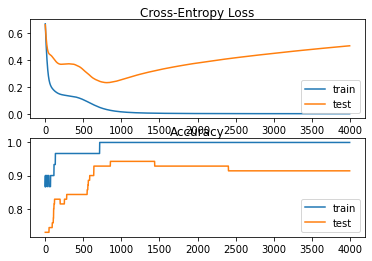

In [6]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can tie all of these pieces together; the complete example is listed below.

In [7]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


Running the example first reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

A figure is created showing line plots of the model loss and accuracy on the train and test sets. We can see that the expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again. We can also see flat spots in the ups and downs in the validation loss by reviewing the figure. Any early stopping will have to account for these behaviors. We would also expect that a good time to stop training might be around epoch 800.

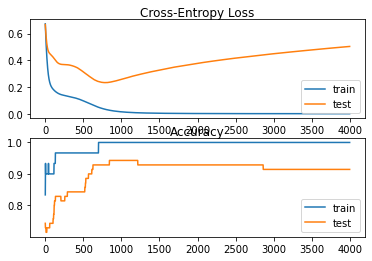

In [8]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

###  Overfit Multilayer With Early Stopping

## Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Use Accuracy**. Update the example to monitor accuracy on the test dataset rather than loss and plot learning curves showing accuracy.
* **Use True Validation Set**. Update the example to split the training set into train and validation sets, then evaluate the model on the test dataset.
* **Regression Example**. Create a new example of using early stopping to address overfitting on a simple regression problem and monitoring mean squared error.

## Summary

In this tutorial, you discovered that stopping the neural network training early before it has overfitted the training dataset can reduce overfitting and improve the generalization of deep neural networks. Specifically, you learned:

* The challenge of training a neural network long enough to learn the mapping, but not so long that it overfits the training data.
* Model performance on a holdout validation dataset can be monitored during training, and training stops when generalization errors increase.
* The use of early stopping requires selecting a performance measure to monitor, a trigger for stopping training, and a selection of the model weights to use.